In [1]:
import random
import numpy
import math

from deap import base
from deap import creator
from deap import tools
from deap import algorithms
from deap import benchmarks

import matplotlib.pyplot as plt

In [2]:
creator.create("Fitness", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.Fitness)

In [3]:
toolbox = base.Toolbox()
# Attribute generator 
toolbox.register("attr_float", random.uniform, -5.12, 5.12)
# Vetor de floats de 3 posições
toolbox.register("individual", tools.initRepeat, creator.Individual, 
    toolbox.attr_float, 3)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [4]:
toolbox.register("evaluate", benchmarks.ackley)
toolbox.register("mate", tools.cxOnePoint)# TwoPoint, Uniform, OnePoint
toolbox.register("mutate", tools.mutGaussian, mu=0.5, sigma=0.4, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)

In [5]:
def main():
    random.seed(64)
    
    pop = toolbox.population(n=30)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("std", numpy.std)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)
    
    pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=5000, 
                                   stats=stats, halloffame=hof, verbose=True)
    
    return pop, log, hof

gen	nevals	avg    	std    	min    	max    
0  	30    	10.3082	2.00474	5.04143	13.3045
1  	18    	8.11402	1.86464	4.79055	11.2561
2  	24    	6.42734	1.45229	4.26827	9.34396
3  	14    	5.19993	0.830433	4.26827	8.30799
4  	24    	4.75621	0.362708	3.74338	5.19043
5  	19    	4.4224 	0.404598	3.74338	5.6906 
6  	15    	4.12309	0.26731 	3.74338	4.79055
7  	19    	4.0028 	0.353523	3.70852	5.32212
8  	21    	3.7895 	0.145354	3.70852	4.26827
9  	20    	3.71872	0.142157	3.18329	4.07321
10 	20    	3.70709	0.206298	3.18329	4.28433
11 	12    	3.58747	0.310997	2.63999	4.37456
12 	26    	3.38942	0.439728	2.63999	5.25623
13 	20    	3.12661	0.317034	2.63999	4.1028 
14 	25    	2.94893	0.351687	2.63999	4.13303
15 	18    	2.76957	0.342574	2.63999	3.78365
16 	17    	2.65917	0.0746612	2.63999	3.0073 
17 	18    	2.65444	0.0778555	2.63999	3.07371
18 	26    	2.6378 	0.011753 	2.57451	2.63999
19 	22    	2.62082	0.350946 	0.998504	3.43312
20 	21    	2.34895	0.604579 	0.998504	2.63999
21 	17    	1.60278	0.768752 	

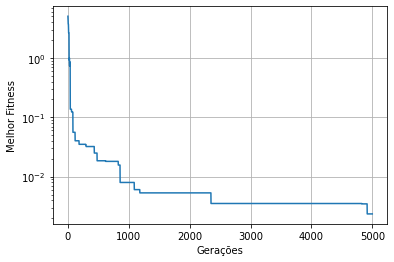

In [6]:

if __name__ == '__main__':
    results = main()
    
    gen = results[1].select('gen')
    
    best_per_gen = results[1].select('min')
    
    t = gen
    s = best_per_gen
    fig, ax = plt.subplots()
    ax.plot(t,s)
    ax.set(xlabel='Gerações', ylabel='Melhor Fitness')
    ax.grid()
    plt.yscale('log')
    plt.show()

C:\Users\fbioa\AppData\Local\Temp/ipykernel_3840/576174276.py:18: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)
C:\Users\fbioa\AppData\Local\Temp/ipykernel_3840/576174276.py:22: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Z = np.fromiter(map(ackley_arg0, zip(X.flat,Y.flat)), dtype=np.float, count=X.shape[0]*X.shape[1]).reshape(X.shape)


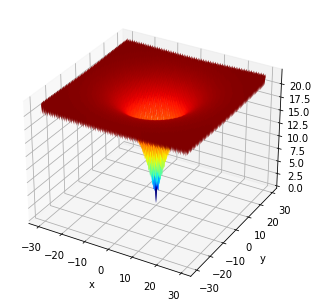

In [12]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt

try:
    import numpy as np
except:
    exit()

from deap import benchmarks

def ackley_arg0(sol):
    return benchmarks.ackley(sol)[0]

fig = plt.figure()
# ax = Axes3D(fig, azim = -29, elev = 50)
ax = Axes3D(fig)
X = np.arange(-30, 30, 0.5)
Y = np.arange(-30, 30, 0.5)
X, Y = np.meshgrid(X, Y)
Z = np.fromiter(map(ackley_arg0, zip(X.flat,Y.flat)), dtype=np.float, count=X.shape[0]*X.shape[1]).reshape(X.shape)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1,  norm=LogNorm(), cmap=cm.jet, linewidth=0.2)
 
plt.xlabel("x")
plt.ylabel("y")

plt.show()